In [1]:
import numpy as np 
import pandas as pd 
import re 
import os

In [8]:
df = pd.read_csv("C:/Users/Admin/Downloads/training.csv", encoding="latin1")

In [10]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv("C:/Users/Admin/Downloads/training.csv",
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
dataset.shape

(1600000, 6)

In [12]:
dataset = dataset[['sentiment', 'tweet']]
dataset.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
#unique values of sentiment
dataset['sentiment'].unique()

array([0, 4], dtype=int64)

In [14]:
#replacing 4 with 1 for positive sentiment
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

In [15]:
dataset['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [22]:
dataset['tweet'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [24]:
#splitting the data
from sklearn.model_selection import train_test_split

In [25]:
X_data, y_data = np.array(dataset['tweet']), np.array(dataset['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=32, stratify=y_data)

In [26]:
X_train.shape, X_test.shape

((1120000,), (480000,))

In [27]:
y_train.shape, y_test.shape

((1120000,), (480000,))

In [28]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

#creating the List of words for training data
Word2Vec_training_data = list(map(lambda x: x.split(), X_train))

In [29]:
Word2Vec_training_data[0]

['I',
 'keep',
 'checking',
 'my',
 'phone',
 'for',
 'msgs,',
 'then',
 'remembering',
 "it's",
 'not',
 'on',
 'silent',
 'any',
 'more',
 '#NigelNoFriends']

In [30]:
word2vec_model = Word2Vec(Word2Vec_training_data,
                        vector_size=Embedding_dimensions,
                        workers=8,
                        min_count=5)

In [32]:
word2vec_model.wv[1]

array([-1.3590664 ,  1.0523456 , -0.9662891 ,  1.4793326 , -0.18987666,
       -0.83198637,  1.469342  ,  0.98747325, -0.03612664,  2.806681  ,
        0.3003707 ,  1.5288466 , -3.0016825 , -0.44228235, -1.2500422 ,
        0.8322073 , -0.58359176,  3.2721715 , -0.6166281 , -0.3783671 ,
        4.0426974 ,  0.6780863 ,  3.305427  , -1.132527  ,  2.7820368 ,
        0.7410659 , -0.06503528,  1.5188371 ,  1.7808236 ,  2.075642  ,
        0.08794867,  1.6502972 , -1.9794079 ,  1.0932863 ,  0.7526232 ,
       -1.1130686 , -2.0583923 ,  4.540269  ,  2.528083  ,  1.5334444 ,
        3.0725465 ,  0.41303197, -0.35476956,  0.08401554,  0.66649336,
        2.6679003 , -0.60095847, -2.4229443 , -0.87828326, -1.8857176 ,
        0.7193006 , -3.3164318 , -2.3018684 ,  0.06591848, -1.024938  ,
       -1.0805978 , -0.1987798 , -1.4430574 ,  0.0665224 , -0.640539  ,
       -0.33217475,  0.5779081 , -1.3282688 , -1.2666625 , -2.7530434 ,
       -1.8091435 , -0.47554636,  1.5344083 ,  0.8273762 , -1.34

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
vocab_length = 60000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


In [35]:
input_length = 60

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (1120000, 60)
X_test.shape : (480000, 60)


In [37]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3,  241, 1663,    6,  230,   11,    1,   97, 7455,   52,   27,
         15, 7933,  190,   81,    1])

In [38]:
second_key, second_value = list(tokenizer.word_index.items())[1]
print("Second Key:", second_key)
print("Second Value:", second_value)

Second Key: to
Second Value: 2


In [41]:
# Reverse the mapping of tokens to words
index_to_word = {token: word for word, token in tokenizer.word_index.items()}
fifth_word = index_to_word[5]
fifth_word

'a'

In [42]:
embedding_matrix[5]

array([-1.90557075, -0.02898525, -2.71053243, -2.96589494,  1.2871666 ,
        0.49965325, -0.81215894, -0.54476285,  1.15350389,  1.6403358 ,
       -3.36646771,  3.11123323, -2.36922073, -0.49823499,  0.51156431,
       -1.32223594, -3.97134042,  2.45418739,  3.05908346,  0.14350367,
        1.60472572,  0.46421808, -1.02706158,  0.17665829,  0.03643809,
       -2.18109035, -0.6364643 ,  1.94326854, -0.67597204, -1.83774519,
        2.39259982,  0.17296135, -0.76473194, -1.14480913,  1.19508219,
       -3.24878025, -3.91775179,  0.83294702, -0.58041382, -2.01929927,
        1.03794646, -2.30334997, -2.05618238,  0.01382992,  3.36006641,
       -0.99845588,  0.75230598,  2.29868388, -0.13691019, -1.67761791,
        1.24058902,  0.97910851, -0.07835456, -0.11614943,  0.21411934,
       -0.80797285, -1.43695724, -2.10737848, -1.38730073, -1.41061902,
        0.3723152 , -0.40742764,  1.65959966,  0.45591596, -0.20301515,
        0.32225081,  1.40899527,  2.15028477,  2.20771313,  1.41

In [43]:
word2vec_model.wv.most_similar('man')

[('girl', 0.7671312093734741),
 ('guy', 0.7443984746932983),
 ('boy', 0.7394371032714844),
 ('lady', 0.6807406544685364),
 ('dude', 0.6783843040466309),
 ('kid', 0.673844575881958),
 ('woman', 0.6562552452087402),
 ('chick', 0.6490068435668945),
 ('boy,', 0.6186076402664185),
 ('bitch', 0.5984165668487549)]

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

In [45]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        SimpleRNN(100, return_sequences=False),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [46]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           6000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6021733 (22.97 MB)
Trainable params: 21733 (84.89 KB)
Non-trainable params: 6000000 (22.89 MB)
_________________________________________________________________


In [50]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    verbose=1,
)

Epoch 1/12
985/985 [==============================] - 272s 271ms/step - loss: 0.5949 - accuracy: 0.6766 - val_loss: 0.5386 - val_accuracy: 0.7286
Epoch 2/12
985/985 [==============================] - 280s 284ms/step - loss: 0.5296 - accuracy: 0.7344 - val_loss: 0.5150 - val_accuracy: 0.7449
Epoch 3/12
985/985 [==============================] - 269s 273ms/step - loss: 0.5132 - accuracy: 0.7463 - val_loss: 0.5206 - val_accuracy: 0.7403
Epoch 4/12
985/985 [==============================] - 269s 273ms/step - loss: 0.5020 - accuracy: 0.7536 - val_loss: 0.5000 - val_accuracy: 0.7537
Epoch 5/12
985/985 [==============================] - 270s 274ms/step - loss: 0.4938 - accuracy: 0.7591 - val_loss: 0.4937 - val_accuracy: 0.7593
Epoch 6/12
985/985 [==============================] - 274s 279ms/step - loss: 0.4884 - accuracy: 0.7626 - val_loss: 0.4944 - val_accuracy: 0.7592
Epoch 7/12
985/985 [==============================] - 271s 275ms/step - loss: 0.4837 - accuracy: 0.7656 - val_loss: 0.4879 -

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

15000/15000 [==============================] - 98s 6ms/step


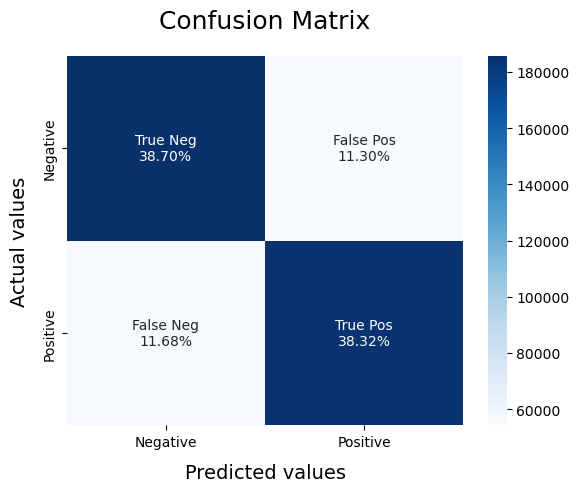

In [53]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [54]:
# SAVING THE MODEL
import pickle 
# Saving Word2Vec-Model
word2vec_model.wv.save('Word2Vec-twitter-100')
word2vec_model.wv.save_word2vec_format('Word2Vec-twitter-100-trainable')

# Saving the tokenizer
with open('Tokenizer.pickle', 'wb') as file:
    pickle.dump(tokenizer, file)

# Saving the TF-Model.
training_model.save('Sentiment-RNN')
training_model.save_weights("Model Weights/weights")

INFO:tensorflow:Assets written to: Sentiment-RNN\assets


INFO:tensorflow:Assets written to: Sentiment-RNN\assets


In [55]:
# Prediction on new data
import pickle
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model

from gensim.models import KeyedVectors

# Load the Word2Vec model as a KeyedVectors object
word2vec_model1 = KeyedVectors.load('Word2Vec-twitter-100')


# Load the tokenizer
with open('Tokenizer.pickle', 'rb') as file:
    tokenizer = pickle.load(file)

# Load the TF-Model
training_model = load_model('Sentiment-RNN')

In [56]:
new_tweet = "Today has been a terrible day. Nothing is going my way, and it feels like everything is falling apart. #badluck #feelingdown 😞"

# Tokenize and pad the new tweet
input_length = 60  # Adjust this to match the input length used during training
new_tweet_tokens = tokenizer.texts_to_sequences([new_tweet])
new_tweet_tokens_padded = pad_sequences(new_tweet_tokens, maxlen=input_length)

In [57]:
# Predict sentiment for the new tweet
sentiment_probabilities = training_model.predict(new_tweet_tokens_padded)

# If it's binary sentiment classification (positive/negative), you can use argmax to get the predicted sentiment
predicted_sentiment = "Positive" if sentiment_probabilities[0][0] > 0.5 else "Negative"

print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 266ms/step
Predicted Sentiment: Negative


In [58]:
tweet_embeddings = training_model.layers[0](new_tweet_tokens_padded).numpy()

In [59]:
import numpy as np
np.set_printoptions(threshold=np.inf)

print(tweet_embeddings)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000